<a href="https://colab.research.google.com/github/muroo123/pandas/blob/main/pandas_section2_%EC%9E%85%EC%B6%9C%EB%A0%A5%EA%B3%BC_%EC%9D%B8%EB%8D%B1%EC%8A%A4_%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

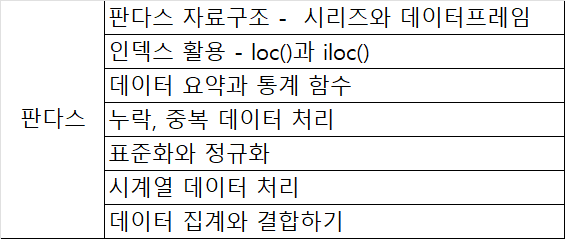

- 판다스 API : https://pandas.pydata.org/pandas-docs/stable/reference/index.html
- 넘파이 API : https://numpy.org/doc/stable/reference/index.html
- Python for Data Analysis(3판) : https://wesmckinney.com/book/

## INPUT/OUTPUT
- CSV : read_csv(), to_csv()
- JSON : read_json(), to_json()
- HTML : read_html(), to_html()
- Local Clipboard : read_clipboard(), to_clipboard()
- MS Excel : read_excel(), to_excel()
- SQL : read_sql(), to_sql()

## CSV 파일 read_csv(), to_csv()
- csv 파일은 컬럼 구분이 콤마(,) 로 이루어진 파일
- df = pd.read_csv(파일이름) : csv 형식의 파일을 읽어 DataFrame 객체로 가져옴
- df.to_csv(파일이름, index=True) : DataFrame을 csv 파일로 저장

- 옵션
  - path : 파일 위치
  - sep or delimiter : 구분 문자
  - header : 열이름(기본 0), header=None(열이름 없음)
  - index_col : 행 인덱스 번호
  - names : 열 이름 문자열 리스트
  - skiprows : skip할 row 번호
  - skip_footer : 마지막 몇 줄 skip
  - encoding : 인코딩 종류(utf-8, euc_kr, cp949)

In [2]:
# DataFrame을 csv 파일로 만들기
import pandas as pd

# 리스트 형태로 데이터 구성하기
data_list = [['류선재', 90, 88, 78],
             ['임솔', 95, 89, 76],
             ['김태성', 85, 98, 67],
             ['백인혁', 85, 90, 77],
             ['박복순', 55, 45, 30] ]

df = pd.DataFrame(data_list, columns = ['name','kor', 'eng', 'mat'])
print(df)

#csv 파일로 저장, index 자동 생성되어 저장됨
# colab에서는 colab 공간에 저장, jupyter는 기본 폴더에 저장
df.to_csv('./score_202406.csv')

#index 제거하고 저장
df.to_csv('./socore_noindex.csv', index=False)



  name  kor  eng  mat
0  류선재   90   88   78
1   임솔   95   89   76
2  김태성   85   98   67
3  백인혁   85   90   77
4  박복순   55   45   30


In [ ]:
# cvs 파일 읽어서 DataFrame 만들기
df2 = pd.read_csv('./score_202406.csv')
df2


,Unnamed: 0,name,kor,eng,mat
0,0,류선재,90,88,78
1,1,임솔,95,89,76
2,2,김태성,85,98,67
3,3,백인혁,85,90,77
4,4,박복순,55,45,30


In [ ]:
print(df2.index)
print(df2.columns)

RangeIndex(start=0, stop=5, step=1)
Index(['Unnamed: 0', 'name', 'kor', 'eng', 'mat'], dtype='object')


In [ ]:
# header 없음으로 주면 첫번째 row부터 데이타처리
df3 = pd.read_csv('./score_202406.csv', header=None)
df3



,0,1,2,3,4
0,NaN,name,kor,eng,mat
1,0.0,류선재,90,88,78
2,1.0,임솔,95,89,76
3,2.0,김태성,85,98,67
4,3.0,백인혁,85,90,77
5,4.0,박복순,55,45,30


In [ ]:
print(df3.index)
print(df3.columns)

RangeIndex(start=0, stop=6, step=1)
Index([0, 1, 2, 3, 4], dtype='int64')


In [ ]:
# index_col 행 인덱스 번호 설정
df4 = pd.read_csv('./score_202406.csv', index_col=0)
df4



,name,kor,eng,mat
0,류선재,90,88,78
1,임솔,95,89,76
2,김태성,85,98,67
3,백인혁,85,90,77
4,박복순,55,45,30


In [ ]:
print(df4.index)
print(df4.columns)

Index([0, 1, 2, 3, 4], dtype='int64')
Index(['name', 'kor', 'eng', 'mat'], dtype='object')


In [ ]:
# skiprows에서 필요 없는 row 제외하고 DataFrame 생성
df5 = pd.read_csv('./score_202406.csv', skiprows=[2,4])
df5

,Unnamed: 0,name,kor,eng,mat
0,0,류선재,90,88,78
1,2,김태성,85,98,67
2,4,박복순,55,45,30


## encoding : 한글포함 된 데이타가 있으면 encoding 옵션 변경해야 함
 - utf-8 : 유니코드를 위한 가변 길이 문자 인코딩 방식 중 하나. 8bit 체계를 사용하며 유니코드 한 문자를 나타내기 위해 1바이트에서 4바이트까지 사용한다.
 - euc-kr : EUC(Extended Unix Code)는 확장 유닉스 코드로 한국어, 중국어, 일본어 문자를 표현하기 위해 사용한 8비트 문자 인코딩 방식. EUC-KR은 과거 한글 완성형코드 KS5601 코드 체계와 유사한 한글 완성형을 표현하기 위한 인코딩 방식
 - cp949 : 한국어판 Microsoft Windows의 기본 코드 페이지로, 한글 인코딩의 한 종류이며 EUC-KR의 확장형이다. '통합 완성형'이나 '확장 완성형'이라고도 한다. 마이크로소프트가 개발했기 때문에 MS949, Windows-949 등으로도 불린다.
 - 파이썬 codecs :  https://docs.python.org/3/library/codecs.html#standard-encodings

In [ ]:
import pandas as pd

# csv 파일 생성시 encoding euc_kr로 파일 생성
df.to_csv('./score_utf8.csv', index=None) # default : utf-8
print(df)


In [ ]:
# csv 파일 생성시 encoding euc_kr로 파일 생성
df.to_csv('./score_euc_kr.csv', index=None, encoding='euc_kr') # default : utf-8
print(df)



  name  kor  eng  mat
0  류선재   90   88   78
1   임솔   95   89   76
2  김태성   85   98   67
3  백인혁   85   90   77
4  박복순   55   45   30


In [ ]:
# csv 파일 생성시 encoding euc_kr로 파일 생성
df.to_csv('./score_cp949.csv', index=None, encoding='cp94') # default : utf-8
print(df)



In [ ]:
# encoding euc_kr로 생성 된 파일은 utf-8로 읽어 올수 없다.
df_utf8 = pd.read_csv('./score_euc_kr.csv', encoding='utf-8')  # default : utf-8
print(df_utf8)



UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 0: invalid start byte

In [ ]:
# encoding euc_kr로 동일한 경우
df_euckr = pd.read_csv('./score_euc_kr.csv', encoding='euc_kr')
print(df_euckr)



  name  kor  eng  mat
0  류선재   90   88   78
1   임솔   95   89   76
2  김태성   85   98   67
3  백인혁   85   90   77
4  박복순   55   45   30


In [ ]:
# encoding cp949로 읽어 온 경우
df_cp949 = pd.read_csv('./score_euc_kr.csv', encoding='cp949')
print(df_cp949)



  name  kor  eng  mat
0  류선재   90   88   78
1   임솔   95   89   76
2  김태성   85   98   67
3  백인혁   85   90   77
4  박복순   55   45   30


## Excel 파일 read_excel(), to_excel()
- df -> Excel -> df

In [ ]:
# DataFrame을 excel 파일로 만들기
import pandas as pd

# 리스트 형태로 데이터 구성하기
data_list = [['류선재', 90, 88, 78],
             ['임솔', 95, 89, 76],
             ['김태성', 85, 98, 67],
             ['백인혁', 85, 90, 77],
             ['박복순', 55, 45, 30] ]

df = pd.DataFrame(data_list, columns = ['name','kor', 'eng', 'mat'])
print(df)

# xlsx 파일로 저장, index 자동 생성되어 저장됨
# colab에서는 colab 공간에 저장, jupyter는 기본 폴더에 저장
df.to_excel('./score_excel.xlsx')


  name  kor  eng  mat
0  류선재   90   88   78
1   임솔   95   89   76
2  김태성   85   98   67
3  백인혁   85   90   77
4  박복순   55   45   30


In [ ]:
df_excel = pd.read_excel('./score_excel.xlsx',engine='openpyxl')
df_excel


,Unnamed: 0,name,kor,eng,mat
0,0,류선재,90,88,78
1,1,임솔,95,89,76
2,2,김태성,85,98,67
3,3,백인혁,85,90,77
4,4,박복순,55,45,30


In [ ]:
# index 포함으로 생성 된 경우 index_col=0 옵션 지정
df_excel = pd.read_excel('./score_excel.xlsx', index_col =0)
df_excel


,name,kor,eng,mat
0,류선재,90,88,78
1,임솔,95,89,76
2,김태성,85,98,67
3,백인혁,85,90,77
4,박복순,55,45,30


In [ ]:
# index 제외하고 파일 생성
df.to_excel('./score_excel_noindex.xlsx', index=False, engine='openpyxl')
df_excel_noindex = pd.read_excel('./score_excel_noindex.xlsx')
df_excel_noindex

,name,kor,eng,mat
0,류선재,90,88,78
1,임솔,95,89,76
2,김태성,85,98,67
3,백인혁,85,90,77
4,박복순,55,45,30


## JSON 파일 read_json(), to_json()
- df -> json -> df

In [ ]:
# DataFrame을 json 파일로 만들기
import pandas as pd

# 리스트 형태로 데이터 구성하기
data_list = [['류선재', 90, 88, 78],
             ['임솔', 95, 89, 76],
             ['김태성', 85, 98, 67],
             ['백인혁', 85, 90, 77],
             ['박복순', 55, 45, 30] ]

df = pd.DataFrame(data_list, columns = ['name','kor', 'eng', 'mat'])
print(df)

# json 파일로 생성 될 내용 확인
print(df.to_json())

# json 파일로 저장, index 자동 생성되어 저장됨
# colab에서는 colab 공간에 저장, jupyter는 기본 폴더에 저장
df.to_json('./score_json.json')

  name  kor  eng  mat
0  류선재   90   88   78
1   임솔   95   89   76
2  김태성   85   98   67
3  백인혁   85   90   77
4  박복순   55   45   30
{"name":{"0":"\ub958\uc120\uc7ac","1":"\uc784\uc194","2":"\uae40\ud0dc\uc131","3":"\ubc31\uc778\ud601","4":"\ubc15\ubcf5\uc21c"},"kor":{"0":90,"1":95,"2":85,"3":85,"4":55},"eng":{"0":88,"1":89,"2":98,"3":90,"4":45},"mat":{"0":78,"1":76,"2":67,"3":77,"4":30}}


In [ ]:
# json 파일 읽어서 df로 만들기
df_json = pd.read_json('./score_json.json')
df_json


,name,kor,eng,mat
0,류선재,90,88,78
1,임솔,95,89,76
2,김태성,85,98,67
3,백인혁,85,90,77
4,박복순,55,45,30


## DataFrame의 구성요소
- DataFrame.index : 행 index
- DataFrame.columns : 열 index
- DataFrame.values : 2차원 데이터

In [ ]:
# df의 index 구성요소 확인
df.index

Index([0, 1, 2, 3, 4], dtype='int64')

In [ ]:
df.index.values[:3]  # array (numpy의 ndarray)

array([0, 1, 2])

In [ ]:
# df의 columns 구성요소 확인
df.columns

Index(['name', 'kor', 'eng', 'mat'], dtype='object')

In [ ]:
df.columns.values  # array

array(['name', 'kor', 'eng', 'mat'], dtype=object)

In [ ]:
# df의 values 구성요소 확인
# ndarray - numpy의 배열, df.values => 2차원
df.values

array([['류선재', 90, 88, 78],
       ['임솔', 95, 89, 76],
       ['김태성', 85, 98, 67],
       ['백인혁', 85, 90, 77],
       ['박복순', 55, 45, 30]], dtype=object)

## DataFrame의 한 개의 column은 Series이다.
- DataFrame[컬럼명] : Series
- DataFrame[[컬럼명1, 컬럼명2, ...]] : DataFrame

In [4]:
# 데이터프레임의 'name' 컬럼의 내용 중 첫 3개 행을 출력합니다.
# dtype : 'object' -> 문자열
s = df['name']
print(s.head(3))

0    류선재
1     임솔
2    김태성
Name: name, dtype: object


In [ ]:
temp = df[['name','kor']]
print(temp.head(3))

  name  kor
0  류선재   90
1   임솔   95
2  김태성   85


In [5]:
# df에 총점(total_score), 평균(mean_score), pass 칼럼 추가
# 총점 = 국어 + 영어 +수학
df['total_score'] = df['kor'] + df['eng'] + df['mat']
df

,name,kor,eng,mat,total_score
0,류선재,90,88,78,256
1,임솔,95,89,76,260
2,김태성,85,98,67,250
3,백인혁,85,90,77,252
4,박복순,55,45,30,130


In [6]:
# 개인별 평균
df['mean_score'] = df[['kor', 'eng', 'mat' ]].mean(axis=1)
df

,name,kor,eng,mat,total_score,mean_score
0,류선재,90,88,78,256,85.333333
1,임솔,95,89,76,260,86.666667
2,김태성,85,98,67,250,83.333333
3,백인혁,85,90,77,252,84.000000
4,박복순,55,45,30,130,43.333333


In [7]:
# mean_score > 80 이면 True, 아니라면, False로 구성된  pass column 추가
df['pass'] = df['mean_score'] > 80
df

,name,kor,eng,mat,total_score,mean_score,pass
0,류선재,90,88,78,256,85.333333,True
1,임솔,95,89,76,260,86.666667,True
2,김태성,85,98,67,250,83.333333,True
3,백인혁,85,90,77,252,84.000000,True
4,박복순,55,45,30,130,43.333333,False


# index(row), columns로 원하는 데이타 찾기

### 1. 눈에 보이는 label (다양한 Index타입이 존재)
- DataFrame.loc[:, 시작컬럼명:끝컬럼명]

### 2. 눈에 보이지 않는 integer 번호 (python에서의 index번호 개념)
- DataFrame.iloc[:, 시작컬럼번호:끝컬럼번호+1]
   - 특정 번호부터 끝까지 모든 컬럼을 대상으로 하려면 끝컬럼번호+1 정보를 생략함



In [8]:
df

,name,kor,eng,mat,total_score,mean_score,pass
0,류선재,90,88,78,256,85.333333,True
1,임솔,95,89,76,260,86.666667,True
2,김태성,85,98,67,250,83.333333,True
3,백인혁,85,90,77,252,84.000000,True
4,박복순,55,45,30,130,43.333333,False


### dataframe.loc(row,col)
- row : index
- col : column 명(series의 이름)

In [9]:
# 실제 업무에서는 index가 대부분 숫자형이 아니라, 문자형이 오는 경우가 많음.
# 문자형으로 오게되면, start:end(end-1)
df[1:3] #<---추천하지 않음

,name,kor,eng,mat,total_score,mean_score,pass
1,임솔,95,89,76,260,86.666667,True
2,김태성,85,98,67,250,83.333333,True


In [10]:
# dataframe 내의 데이터 조회
#방법 1: dataframe.loc(row_index, column_index) 를 통해 dataframe에 accesing 하세요.
#      - row_index, clumn_index에 조건식이 올 수 있다는 것을 기억하세요.

df.loc[0] #get row info. using index

name                 류선재
kor                   90
eng                   88
mat                   78
total_score          256
mean_score     85.333333
pass                True
Name: 0, dtype: object

In [11]:
# 첫번째 이름만 조회
df.loc[0, 'name']

'류선재'

In [14]:
# 0~2 row 데이타 출력
df.loc[0:2]

,name,kor,eng,mat,total_score,mean_score,pass
0,류선재,90,88,78,256,85.333333,True
1,임솔,95,89,76,260,86.666667,True
2,김태성,85,98,67,250,83.333333,True


In [15]:
# 0~2 row 데이타 중 name~total_score 칼럼까지만 출력
df.loc[0:2, 'name':'total_score'] #using range operator

,name,kor,eng,mat,total_score
0,류선재,90,88,78,256
1,임솔,95,89,76,260
2,김태성,85,98,67,250


In [ ]:
# pass가 True인 loc 선택
df['pass'] == True # 결과 True, False로 나옴

0     True
1     True
2     True
3     True
4    False
Name: pass, dtype: bool

In [ ]:
# eng 90 이상만 선택
df['eng'] >= 90

0    False
1    False
2     True
3     True
4    False
Name: eng, dtype: bool

In [ ]:
# pass가 True인 row 조회
df.loc[df['pass'] == True]

,name,kor,eng,mat,total_score,mean_score,pass
0,류선재,90,88,78,256,85.333333,True
1,임솔,95,89,76,260,86.666667,True
2,김태성,85,98,67,250,83.333333,True
3,백인혁,85,90,77,252,84.000000,True


In [16]:
# pass가 True이고 kor 90초과인 row 조회
df.loc[(df['pass']==True) & (df['kor'] > 90)]

,name,kor,eng,mat,total_score,mean_score,pass
1,임솔,95,89,76,260,86.666667,True


In [17]:
df

,name,kor,eng,mat,total_score,mean_score,pass
0,류선재,90,88,78,256,85.333333,True
1,임솔,95,89,76,260,86.666667,True
2,김태성,85,98,67,250,83.333333,True
3,백인혁,85,90,77,252,84.000000,True
4,박복순,55,45,30,130,43.333333,False


In [18]:
# default index를 'name'으로 바꾸고 다시 접근해 보겠습니다.

df.set_index(keys='name', inplace=True)
df

,kor,eng,mat,total_score,mean_score,pass
name,,,,,,
류선재,90,88,78,256,85.333333,True
임솔,95,89,76,260,86.666667,True
김태성,85,98,67,250,83.333333,True
백인혁,85,90,77,252,84.000000,True
박복순,55,45,30,130,43.333333,False


In [19]:
df.index.name ='이름'
df

,kor,eng,mat,total_score,mean_score,pass
이름,,,,,,
류선재,90,88,78,256,85.333333,True
임솔,95,89,76,260,86.666667,True
김태성,85,98,67,250,83.333333,True
백인혁,85,90,77,252,84.000000,True
박복순,55,45,30,130,43.333333,False


In [20]:
# 인덱스가 임솔  row를 가지고 오세요.
df.loc['임솔']

kor                   95
eng                   89
mat                   76
total_score          260
mean_score     86.666667
pass                True
Name: 임솔, dtype: object

In [21]:
# 인덱스가 류선재부터 김태성까지 row정보를 가져오세요.
df.loc['류선재':'김태성']

,kor,eng,mat,total_score,mean_score,pass
이름,,,,,,
류선재,90,88,78,256,85.333333,True
임솔,95,89,76,260,86.666667,True
김태성,85,98,67,250,83.333333,True


In [22]:
# col mean_score > 85 인 row에서 column total_score, pass 데이터를 가져오세요.

# col mean_score > 85 데이타 확인
df['mean_score']>85

이름
류선재     True
임솔      True
김태성    False
백인혁    False
박복순    False
Name: mean_score, dtype: bool

In [ ]:
# total_score, pass 칼럼 데이타 확인
df[['total_score','pass']]

,total_score,pass
이름,,
류선재,256,True
임솔,260,True
김태성,250,True
백인혁,252,True
박복순,130,False


In [23]:
# col mean_score > 85 인 row에서 column total_score, pass 데이터를 조회
df.loc[df['mean_score']>85, ['total_score','pass']]

,total_score,pass
이름,,
류선재,256,True
임솔,260,True


### dataframe.iloc[row, col]
- default index를 사용, set_index를 통해 index를 바꿔도, default index는 계속 존재함
- 정수값만 row, col에 들어감

In [ ]:
df

,kor,eng,mat,total_score,mean_score,pass
이름,,,,,,
류선재,90,88,78,256,85.333333,True
임솔,95,89,76,260,86.666667,True
김태성,85,98,67,250,83.333333,True
백인혁,85,90,77,252,84.000000,True
박복순,55,45,30,130,43.333333,False


In [24]:
df[0:1]

,kor,eng,mat,total_score,mean_score,pass
이름,,,,,,
류선재,90,88,78,256,85.333333,True


In [25]:
df.iloc[0:1]

,kor,eng,mat,total_score,mean_score,pass
이름,,,,,,
류선재,90,88,78,256,85.333333,True


In [26]:
df.iloc[0:2, 1:4]

,eng,mat,total_score
이름,,,
류선재,88,78,256
임솔,89,76,260
